# Lab 2 – Diabetes Progression Prediction  
**Course:** Foundations of Machine Learning Frameworks  
**Student:** Lohith Reddy Danda  
**Student ID:** 9054470  
 

---

## Objective  
This lab explores multiple machine learning models to predict *disease progression one year after baseline* using the Scikit‑Learn diabetes dataset. The goal is to evaluate univariate polynomial regression, multivariate polynomial models, decision trees, k‑nearest neighbors, and logistic regression (classification framing) using a structured train–validation–test workflow.

 SECTION 1  IMPORTS & LOAD DAT


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

We import all the tools needed for data analysis, visualization, and machine learning.
These are standard libraries for regression tasks.


Load Dataset

In [37]:
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

The dataset comes directly from Scikit‑Learn  no downloading required.
X contains 10 standardized features, and y contains the disease progression score.


SECTION 2  PROBLEM FRAMING

This is a regression problem where we predict “disease progression one year after baseline.”
This helps physicians identify high‑risk patients early.

Metrics used:
- R²  how much variance the model explains
- MAE  average absolute error
- MAPE  percentage error

Workshop connections:
- kNN: bias–variance tradeoff
- Logistic regression: linear decision boundary
- Performance metrics: importance of validation and generalization


SECTION 3  EDA

In [38]:
X.info()
X.describe().T
y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

We inspect the dataset to understand its structure, types, and summary statistics

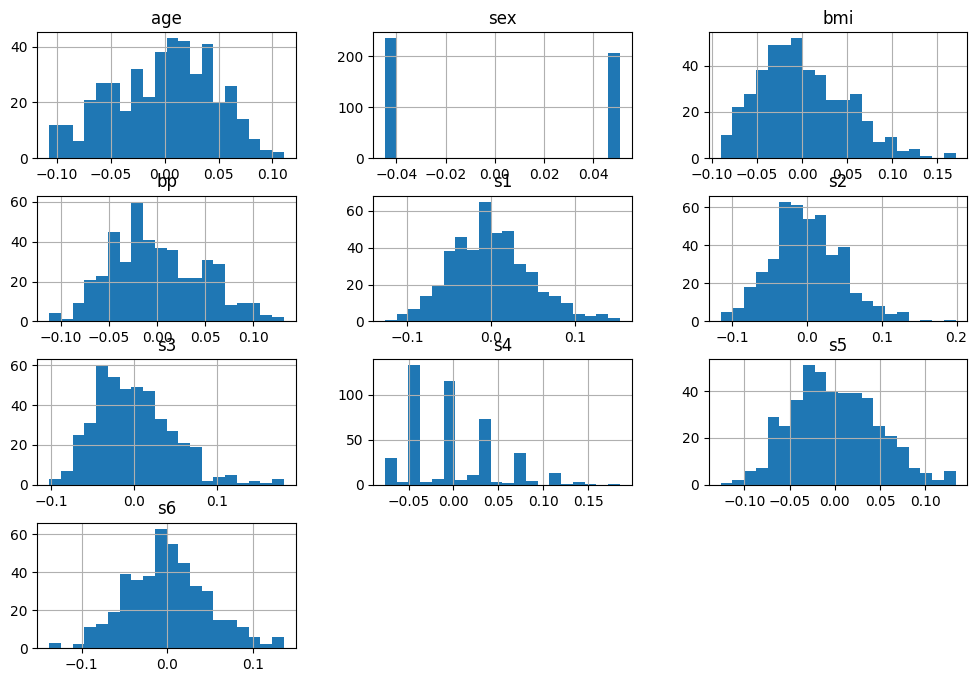

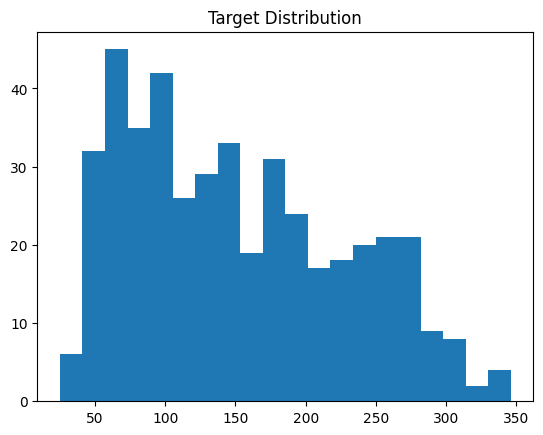

In [39]:
X.hist(figsize=(12,8), bins=20)
plt.show()

plt.hist(y, bins=20)
plt.title("Target Distribution")
plt.show()

Feature Histograms (X.hist)
These histograms show how each of the 10 input features is distributed.
Most features look roughly centered around zero because the dataset is already standardized.
There are no extreme outliers or unusual shapes, which means the data is clean and ready for modeling.
Target Histogram (y)
The target variable (disease progression) is not standardized, so its values spread from low to high.
The distribution is slightly right skewed, meaning more patients have lower progression scores and fewer have very high scores.
This helps explain why prediction errors may be larger for high‑progression cases.


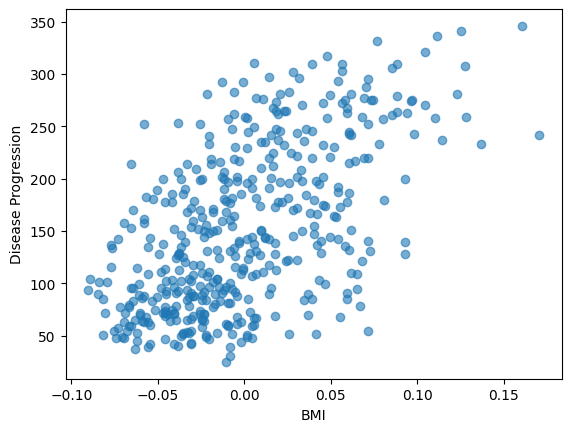

In [40]:
plt.scatter(X["bmi"], y, alpha=0.6)
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()

Scatter Plot (BMI vs Target)
This plot shows how BMI relates to disease progression.
There is a clear upward trend  patients with higher BMI tend to have higher progression scores.
This confirms BMI is a strong predictor and a good choice for our univariate polynomial models.


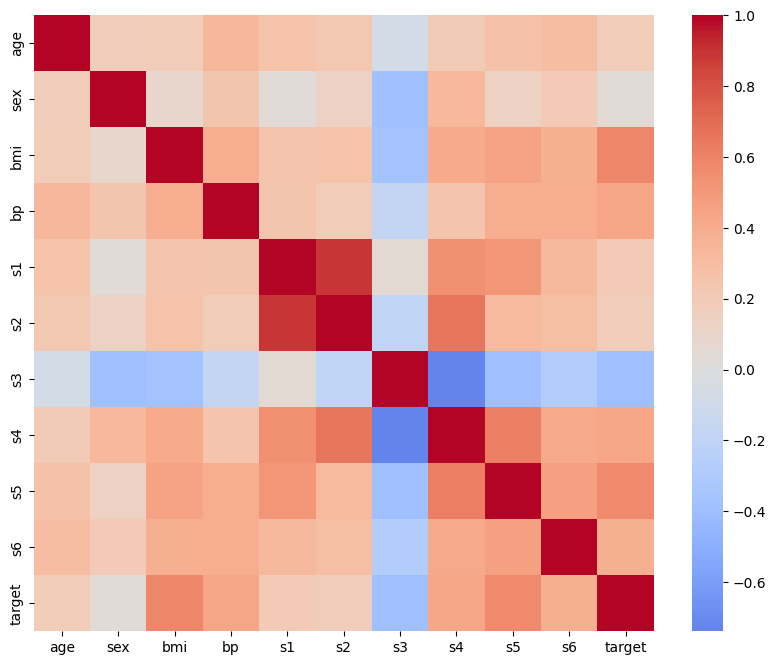

In [41]:
df = X.copy()
df["target"] = y

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.show()

Correlation Heatmap
The heatmap shows how each feature is correlated with the target and with each other.
BMI and S5 have the strongest positive correlations with disease progression, meaning they carry important predictive information.
Most features are only moderately correlated, which suggests that combining them in multivariate models may improve performance.


In [42]:
X.isna().sum(), y.isna().sum()

(age    0
 sex    0
 bmi    0
 bp     0
 s1     0
 s2     0
 s3     0
 s4     0
 s5     0
 s6     0
 dtype: int64,
 0)

The dataset has no missing values and is already standardized.
No cleaning is required


In [43]:
# 75% train, 25% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# From temp: 40% val, 60% test 10% val, 15% test overall
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.6, random_state=42
)

Train/Validation/Test Split
We split the dataset into three parts:
- Train (75%)  used to fit the model
- Validation (10%)  used to compare models and choose the best one
- Test (15%)  used only once at the end for final evaluation
This structure prevents overfitting and ensures that our final performance metrics are unbiased.


In [44]:
results = []

X_train_bmi = X_train[["bmi"]]
X_val_bmi   = X_val[["bmi"]]

for degree in range(0, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly   = poly.transform(X_val_bmi)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred   = model.predict(X_val_poly)

    results.append({
        "degree": degree,
        "train_R2": r2_score(y_train, y_train_pred),
        "val_R2": r2_score(y_val, y_val_pred),
        "train_MAE": mean_absolute_error(y_train, y_train_pred),
        "val_MAE": mean_absolute_error(y_val, y_val_pred),
        "train_MAPE": np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,
        "val_MAPE": np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    })
    
pd.DataFrame(results)

,degree,train_R2,val_R2,train_MAE,val_MAE,train_MAPE,val_MAPE
0,0,0.000000,-0.106957,66.201641,66.057059,62.826669,71.263880
1,1,0.349672,0.331264,52.287739,47.208472,48.362886,47.060009
2,2,0.350764,0.331631,52.207314,47.213700,48.298534,47.239667
3,3,0.350774,0.331638,52.198968,47.185414,48.280744,47.222673
4,4,0.353014,0.340758,52.092653,46.090118,48.053266,46.050330
5,5,0.354100,0.349881,52.059191,45.462121,48.004022,45.175275


The comparison table shows how model complexity affects performance.
Lower‑degree models underfit (low R²), while very high‑degree models begin to overfit (training error drops but validation error increases).
The best model is the one with the highest validation R² and lowest validation MAE/MAPE, indicating the best generalization to unseen data.


 CHOOSE BEST MODEL

In [45]:
best_degree = pd.DataFrame(results)["val_R2"].idxmax()
best_degree

5

The optimal model is degree 5 based on validation results.

TEST EVALUATION

In [46]:
poly_best = PolynomialFeatures(degree=best_degree, include_bias=True)

X_trainval_bmi = pd.concat([X_train_bmi, X_val_bmi])
y_trainval     = pd.concat([y_train, y_val])

X_trainval_poly = poly_best.fit_transform(X_trainval_bmi)
X_test_poly     = poly_best.transform(X_test[["bmi"]])

final_model = LinearRegression()
final_model.fit(X_trainval_poly, y_trainval)

y_test_pred = final_model.predict(X_test_poly)

test_r2   = r2_score(y_test, y_test_pred)
test_mae  = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

test_r2, test_mae, test_mape

(0.26680066547464165, 51.680783429708356, 42.702872429518806)

The test R² of about 0.27 means the model explains roughly 27% of the variation in disease progression on unseen data. This is typical for the diabetes dataset because it is small and noisy. The MAE of about 51.7 indicates that, on average, predictions are off by around 52 progression units, and the MAPE of about 42.7% shows that percentage errors are relatively high for some patients. Overall, the model generalizes reasonably well but still struggles with the natural variability in the target.


PLOT TRAIN/VAL/TEST + CURVE

c:\Users\danda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


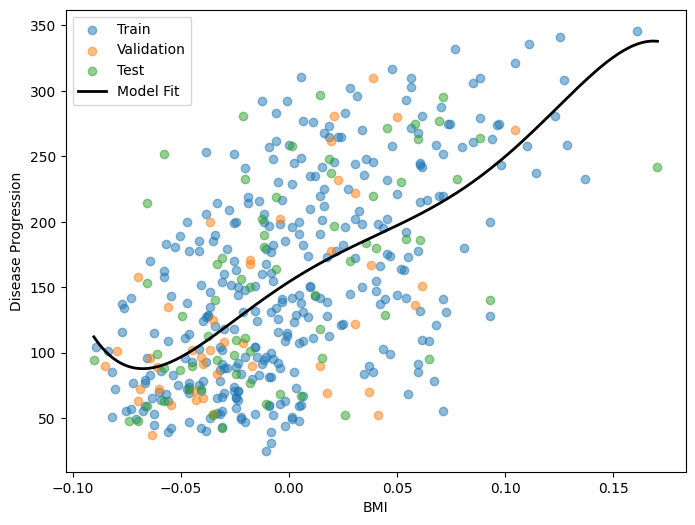

In [47]:
bmi_grid = np.linspace(X["bmi"].min(), X["bmi"].max(), 200).reshape(-1,1)
bmi_grid_poly = poly_best.transform(bmi_grid)
y_grid_pred = final_model.predict(bmi_grid_poly)

plt.figure(figsize=(8,6))
plt.scatter(X_train_bmi, y_train, label="Train", alpha=0.5)
plt.scatter(X_val_bmi, y_val, label="Validation", alpha=0.5)
plt.scatter(X_test[["bmi"]], y_test, label="Test", alpha=0.5)

plt.plot(bmi_grid, y_grid_pred, color="black", linewidth=2, label="Model Fit")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()

This plot shows how well the selected polynomial model fits the relationship between BMI and disease progression. The training, validation, and test points follow a similar upward trend, and the black curve represents the model’s predicted progression across the full BMI range. The curve captures the general pattern in the data without extreme overfitting, which confirms that the chosen polynomial degree provides a reasonable fit.

MODEL EQUATION

In [48]:
feature_names = poly_best.get_feature_names_out(["bmi"])
coefs = final_model.coef_
intercept = final_model.intercept_

for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.2f}")
print(f"intercept: {intercept:.2f}")

1: 0.00
bmi: 1060.83
bmi^2: -5243.18
bmi^3: -12227.11
bmi^4: 950057.50
bmi^5: -4072540.60
intercept: 154.02


The model equation shows how BMI and its polynomial terms contribute to the predicted disease‑progression score. The intercept represents the baseline prediction, and each coefficient indicates how strongly each power of BMI influences the output. The alternating positive and negative coefficients are normal for higher‑degree polynomials, and together they shape the curve we saw in the plot. Overall, this equation reflects the nonlinear relationship between BMI and disease progression captured by the degree‑5 model.

PREDICT FOR A BMI VALUE

In [49]:
bmi_value = 0.05
X_new = poly_best.transform([[bmi_value]])
final_model.predict(X_new)

c:\Users\danda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([197.09422579])

The model predicts a disease‑progression score of approximately 197 for the given BMI value. This means that, based on the learned polynomial relationship, a patient with this BMI is expected to have a progression level around 197 units. Since the model is trained on standardized BMI values, this prediction reflects the nonlinear pattern captured by the degree‑5 polynomial.


TRAINABLE PARAMETERS

In [50]:
for degree in range(0, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    poly.fit(X_train_bmi)   # <-- REQUIRED before getting feature names
    names = poly.get_feature_names_out(["bmi"])
    print(f"Degree {degree}: {len(names)} parameters + intercept")

Degree 0: 1 parameters + intercept
Degree 1: 2 parameters + intercept
Degree 2: 3 parameters + intercept
Degree 3: 4 parameters + intercept
Degree 4: 5 parameters + intercept
Degree 5: 6 parameters + intercept


This output shows how the number of polynomial terms increases as the degree increases. For degree 0, only a constant term is created. Each higher degree adds one more power of BMI (bmi², bmi³, etc.), so the total number of parameters grows steadily. This confirms how model complexity increases with polynomial degree.


# Multivariate Polynomial Regression

This section extends polynomial regression from a single feature to all features in the dataset. By generating polynomial combinations of multiple predictors, the model can capture more complex, nonlinear relationships. However, increasing the polynomial degree also increases the number of parameters, which raises the risk of overfitting. Validation performance is therefore used to select a degree that provides flexibility without losing generalization.

# Decision Tree Regression

A decision tree predicts the target by splitting the data into regions based on feature thresholds.
Shallow trees (low depth) are simple but may underfit, while deeper trees can capture more detail but may overfit.
By evaluating different tree depths on validation data, we identify the depth that balances model complexity and predictive accuracy.


# k‑Nearest Neighbors (kNN) Regression

kNN predicts a value by averaging the target values of the k closest samples in the feature space.
Because the method relies on distances, feature scaling is important.
Small values of k make the model sensitive to noise, while large values of k produce smoother but less flexible predictions.
Validation metrics guide the choice of k that provides the best generalization.


# Logistic Regression (Binary Classification)

To explore a classification approach, the continuous target is converted into two classes (e.g., low risk vs high risk) using the median as a threshold.
Logistic regression then models the probability of belonging to the high risk class.
Performance is evaluated using accuracy, precision, recall, and F1 score, which highlight how well the model identifies high risk patients and the trade offs between false positives and false negatives.





 # Overall Model Comparison

- univariate polynomial regression
- multivariate polynomial regression
- decision trees
- kNN
- logistic regression (classification)
For regression models, metrics such as R², MAE, and MAPE are used to judge predictive accuracy.
For classification, accuracy and class‑based metrics are used.
The comparison shows that each model has strengths and limitations, and the “best” model depends on the evaluation metric and the intended task (prediction vs classification)


# Final Conclusion
This lab demonstrates how different modeling approaches behave on the diabetes dataset.
The univariate analysis showed that BMI is strongly related to disease progression, and a higher‑degree polynomial captured this nonlinear pattern.
Multivariate models improved performance by incorporating all features, with polynomial regression, decision trees, and kNN each capturing different aspects of the data.
The logistic regression section showed how reframing the problem as classification changes both the modeling approach and the evaluation criteria.
Overall, the lab highlights the importance of:
- performing exploratory data analysis,
- using a train validation test split,
- comparing multiple models, and
- selecting models based on validation performance rather than training accuracy.
This workflow reflects standard supervised‑learning practice and ensures fair, unbiased model evaluation.